In [3]:
# plotly.graph_objects

# graph_objects가 plotly.express.line과 비교하여 다른 점 :
# 시계열 플롯에서 관측점이 '.' 으로 표시되어 있다는 것
# dataset이 go.Scatter(x=X, y=Y)로 정의하고 있다는 것

import numpy as np
import plotly.express as px
import plotly.graph_objects as go

df_pop = px.data.gapminder()
df_korea=df_pop.query("country=='Korea, Rep.'")

X = df_korea['year']
Y = df_korea['lifeExp']

fig = go.Figure(data=go.Scatter(x=X, y=Y))
fig.show()

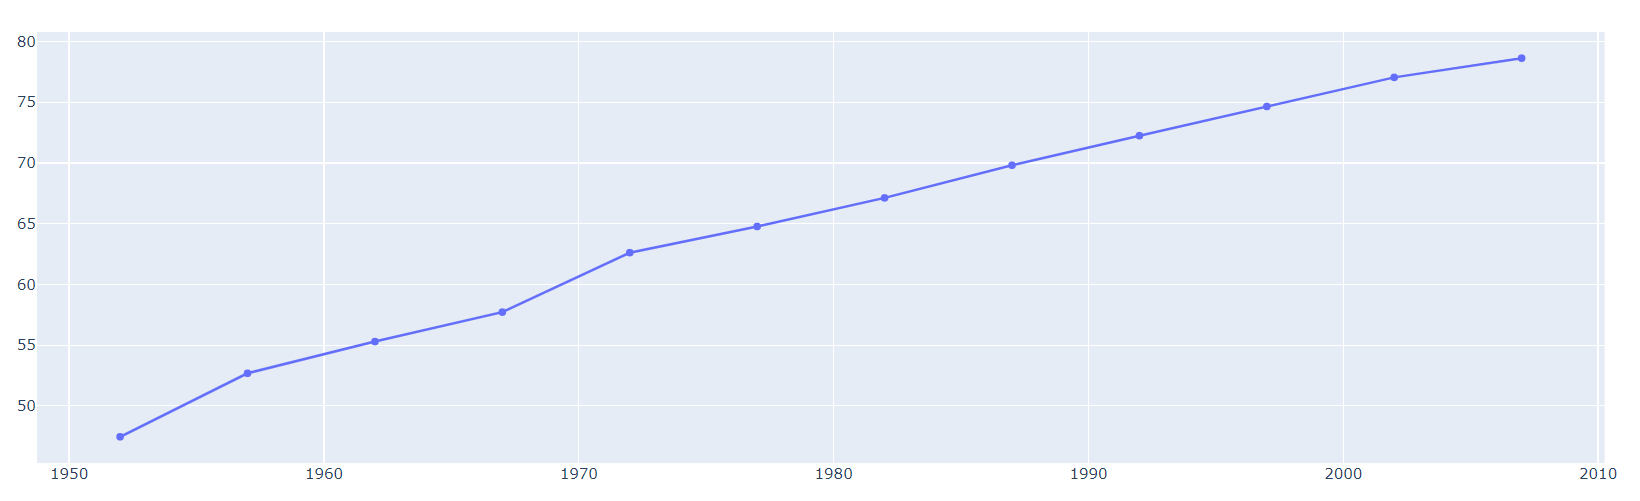

In [4]:
# 하나의 x값에 대응하는 y값이 3개 있을 때
# go.Figure()를 이용한 line 플롯

# x를 시간으로 생각하면, 3개의 시계열을 서로 간에 비교하는 것임.

# go.Figure()의 dataset을 만드는 대신, add.trace를 이용하여 line 플롯을 그리는 예제.

import numpy as np
import plotly.graph_objects as go

np.random.seed(0)
N = 100

x1 = np.linspace(0, 10, N)

y1 = 5. + x1 + np.random.randn(N)
y2 = x1 + np.random.randn(N)
y3 = -5. + x1 + np.random.normal(0, 2, N)

fig = go.Figure()

# go.Scatter의 Mode
# 기본적으로는 lines
# lines+markers 또는 markers로 지정할 수 있음.

fig.add_trace(go.Scatter(x=x1, y=y1, mode='lines', name='line'))
fig.add_trace(go.Scatter(x=x1, y=y2, mode='lines+markers', name='line+marker'))
fig.add_trace(go.Scatter(x=x1, y=y3, mode='markers', name='marker'))

fig.show()

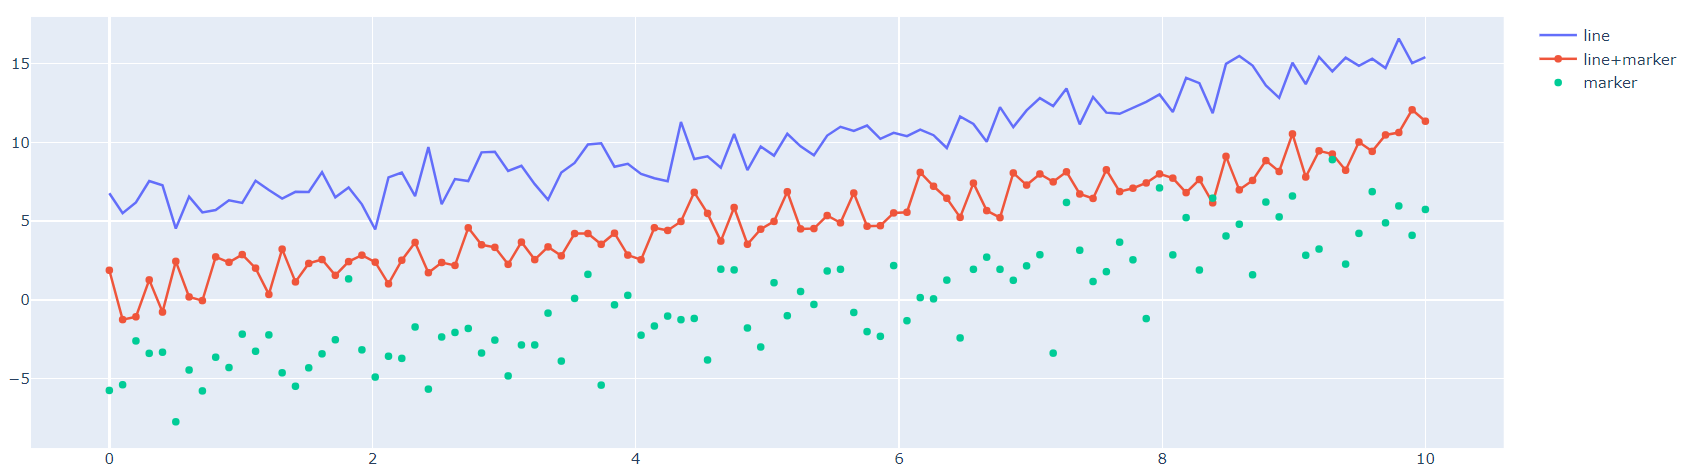

In [5]:
# 3D 시각화를 위한 graph_objects 이용
# 그림을 전후좌우 360도로 돌려서 볼 수 있어서 3차원 관점에서 자료구조를 살펴볼 수 있음.

# go.Figure() 내의 dataset을 각각 go.Scatter3D를 적용하여
# 이를 하나로 모으는 data = [surface_1, surface_2, surface_3]를 만들어서 적용하고 있음.

import numpy as np
import plotly.graph_objects as go

np.random.seed(0)
N = 100

x1 = np.random.normal(1, 1, N)
x1 = np.sort(x1)

x2 = np.random.randn(N)
x2 = np.sort(x2)

y1 = 5. + x1 - 2 * x2 + np.random.normal(0, 4, N)
y2 = -4 * x1 - 2 * x2 ** 3
y3 = -5. + x1 - 3 * x2 + np.random.normal(0, 2, N)

surface_1 = go.Scatter3d(x=x1, y=x2, z=y1)
surface_2 = go.Scatter3d(x=x1, y=x2, z=y2)
surface_3 = go.Scatter3d(x=x1, y=x2, z=y3)

data = [surface_1, surface_2, surface_3]

fig = go.Figure(data=data)
fig.show()

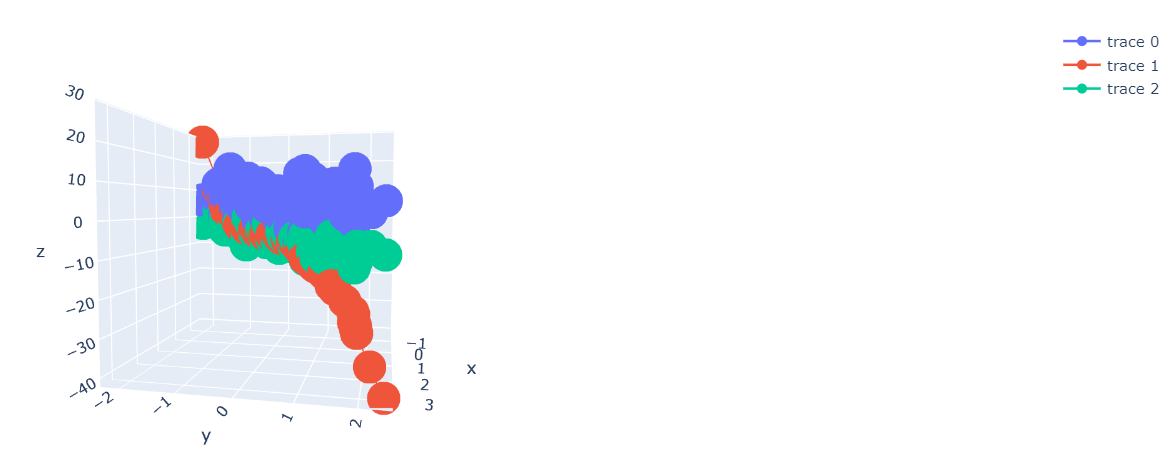

In [6]:
# y = 5 + x1 + 2 * x2 + e(입실론) 회귀모형이 있을 때, 오차에 의해 오염된 y와 x1, x2 표본을 관측하여
# 회귀식 y = 5 + x1 + 2 * x2를 추정하는 그림을 3차원으로 구현한 그림

import numpy as np
import plotly.graph_objects as go
np.random.seed(0)
N = 100

x1, x2 = np.meshgrid(np.linspace(0, 2, N), np.linspace(0, 2, N))
print(x1.shape)

y1 = 5. + x1 + 2 * x2
y2 = y1.copy() + np.random.normal(0, 2, (N, N))

surface_1 = go.Surface(x=x1, y=x2, z=y1)
surface_2 = go.Scatter3d(x=x1.flatten()[::20], # flatten : 2차원 x1, x2, y2를 1차원 자료로 만든 후
                         y=x2.flatten()[::20], # 매 20번째 자료로 Scatter3D를 그리고 있음.
                         z=y2.flatten()[::20], 
                         opacity=0.3, # Scatter3D maker의 투명도를 나타내는 옵션. 0은 완전 투명. 1은 완전 불투명.
                         mode='markers'
                         )

data = [surface_1, surface_2]
fig = go.Figure(data=data)
fig.show()

(100, 100)


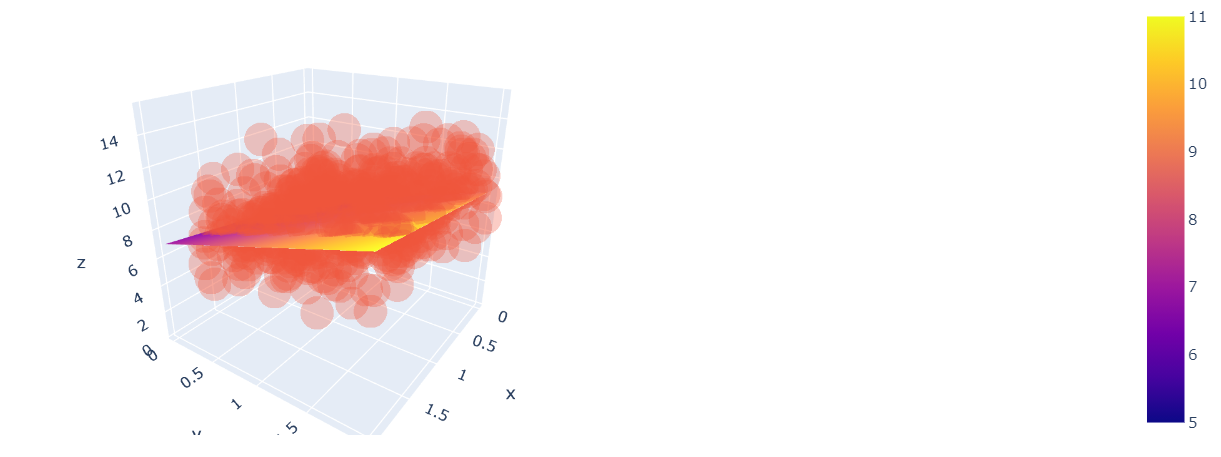

In [7]:
# 평면은 추정하고자 하는 회귀평면
# 옅은 투명도의 maker : 표본관측치를 보여주고 있음.

# plotly.express와 plotly.graph_objects로 그린 그림은 on-line을 통해 구현됨
# -> 그림을 HTML로 저장하여 웹브라우저로 공유가 가능함.

import numpy as np
import plotly.graph_objects as go
import plotly.offline as pyo

np.random.seed(0)
N = 100

x1, x2 = np.meshgrid(np.linspace(0, 2, N), np.linspace(0, 2, N))

y1 = 5. + x1 + 2 * x2
y2 = y1.copy() + np.random.normal(0, 2, (N, N))

surface_1 = go.Surface(x=x1, y=x2, z=y1)
surface_2 = go.Scatter3d(x = x1.flatten()[::20], 
                         y = x2.flatten()[::20],
                         z = y2.flatten()[::20],
                         opacity = 0.3,
                         mode = 'markers'
                         )

data = [surface_1, surface_2]

pyo.iplot(data)

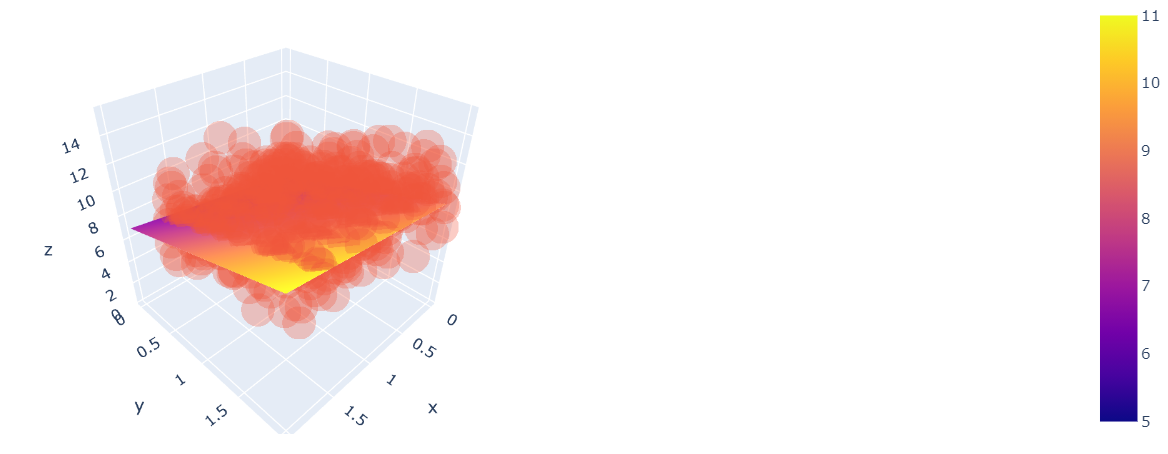

In [8]:
# x와 y를 np.meshgrid를 이용하여 50 x 50 자료를 생성
# go.Scatter3D로 z = sin(x^2 + y^2)를 추정하기 위한 가상의 표본자료

import numpy as np
import plotly.graph_objs as go

X, Y = np.meshgrid(np.linspace(-4, 4, 50), np.linspace(-3, 3, 50))

X.shape
Z = np.sin(X ** 2 + Y ** 2)

fig = go.Figure(data=[#go.Surface(x=X, y=Y, z=Z),
                      go.Scatter3d(x = X.flatten()[::10],
                                   y = Y.flatten()[::10],
                                   z = Z.flatten()[::10],
                                   opacity = 0.9,
                                   mode = 'markers'
                                   )])

fig.show()

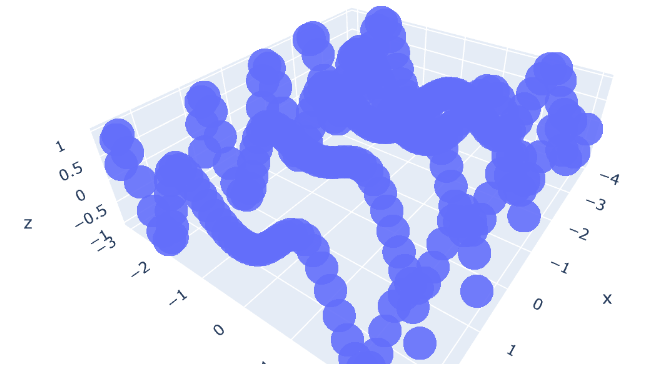

In [9]:
# z = sin(x^2 + y^2) 평면그림과 앞에서 제공한 표본그림을 합성한 것

Z = np.sin(X**2 + Y**2)
Z1 = Z.copy()
Z1 = Z1 + np.random.rand(50, 50)

fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z),
                      go.Scatter3d(x = X.flatten()[::10],
                                   y = Y.flatten()[::10],
                                   z = Z.flatten()[::10],
                                   opacity = 0.9,
                                   mode = 'markers'
                                   )
                      ])

fig.show()

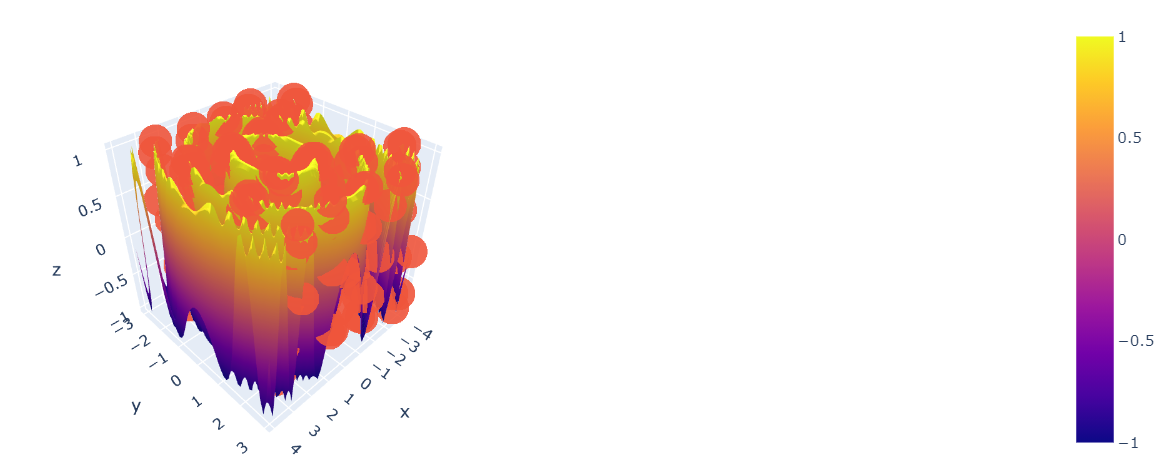

In [10]:
# 위 그림에서 z2 = sin(x) + cos(y)를 추가한 그림

Z = np.sin(X ** 2 + Y ** 2)
Z1 = Z.copy()
Z1 = Z1 + np.random.rand(50, 50)
Z2 = np.sin(X) + np.cos(Y)

fig = go.Figure(data=[go.Surface(x = X, y = Y, z = Z),
                      go.Scatter3d(x = X.flatten()[::10],
                                   y = Y.flatten()[::10],
                                   z = Z1.flatten()[::10],
                                   opacity = 0.7,
                                   mode = 'markers'
                                   ),
                      go.Surface(x = X,
                                 y= Y,
                                 z = Z2)
                      ])

fig.show()

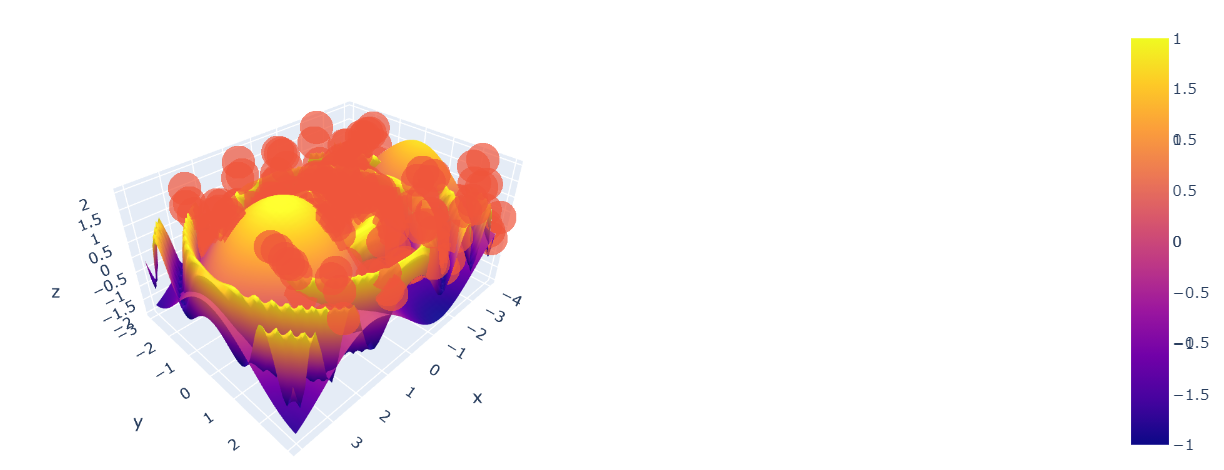